# Анализ продаж интернет-магазина "Стримчик"

Для анализа продаж у нас имеется датасет который содержит данные:
 * Name — название игры
 * Platform — платформа
 * Year_of_Release — год выпуска
 * Genre — жанр игры
 * NA_sales — продажи в Северной Америке (миллионы проданных копий)
 * EU_sales — продажи в Европе (миллионы проданных копий)
 * JP_sales — продажи в Японии (миллионы проданных копий)
 * Other_sales — продажи в других странах (миллионы проданных копий)
 * Critic_Score — оценка критиков (максимум 100)
 * User_Score — оценка пользователей (максимум 10)
 * Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
 
 
 Также, известно, что данные за 2016 год могут быть неполными. Нам нужно выявить определяющие успех игры закономерности. В процессе анализы будут выполнена подготовка данных, исследовательский и статистический анализ данных. Также, будет составлен потрет пользователя каждого региона. Эта аналитика позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год.

### Загрузка данных и изучение общей информации

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #импортируем библиеотеку pandas и откроем датасет
import numpy as np
from scipy import stats as st
import warnings
warnings.simplefilter("ignore")
data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
data.head(10) #просмотрим первые 10 строк

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [49]:
data.info(10) #проверим типы данных в столбцах

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Предобработка данных:

#### Замена названия столбцов с учетом регистра 

In [50]:
data.columns = data.columns.str.lower()
data['genre'] = data['genre'].str.lower() #в столбце genre тоже изменим регистр букв
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Обработка пропущенных значений

In [51]:
#по всем датафрейму проверим пропущенные значения
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [52]:
#По каждому столбцу с пропусками проверил уникальные значения
display(data['year_of_release'].unique())
display(data['genre'].unique())
display(data['critic_score'].unique())
display(data['user_score'].unique())
display(data['rating'].unique())

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy', nan], dtype=object)

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [53]:
#В столбце user_score видим значение tbd. Выше мы использовали метод info() который показал, что формат ячейки objecct
#По общему содержанию, а также по описанию столбца нам известно, что это оценка пользователей (максимум 10). Уберем значения tbd
#а затем заменим тип данных на float
def replace_wrong_user_scores(wrong_user_scores, correct_user_score):
    data['user_score'] = data['user_score'].replace(wrong_user_scores, correct_user_score)
replace_wrong_user_scores('tbd', np.NaN)
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Значение 'tbd' означает 'to be discussed', т.е. рейтинг не определен, что, как мне кажется, позволяет заменить все значения заменить на nan

In [54]:
#В столбце rating есть два значения одинаковые по смыслу. Это K-A и E10+. Ззаменим K-A и E10+ для более точного анализа в дальнейшем.
data['rating'] = data['rating'].replace('K-A', 'E10+')
data['rating'].value_counts()

rating
E       3990
T       2961
M       1563
E10+    1423
EC         8
RP         3
AO         1
Name: count, dtype: int64

In [55]:
data.isna().sum()#повторно просмотрим в каких столбцах содержатся пропуски и уберем их

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

В 6-ти столбцах есть пропущенных значения:
 * столбец name содержит всего 2 пропуска. Оставить пустым не можем, так как непонятно о какой игре идет речь. Просто удалим 2 этих строки
 * в столбцах critic_score, user_score достаточно много значений пропущено. Возможно по этим играм еще не было оценок и поэтому значение пропущено. Заменим их на 0.
 * в столбце year_of_release есть пропущенные значения по причине того, что данные забыли внести или дата выхода точная дата выхода не была известна заранее. Удалим пропущенные строки
 * в столбце genre были пропущены значения потому что разработчики изначально не смогли определиться с жанром и оставили поле пустым или же просто забыли указать
 * столбце rating также подлежит удалению, так как мы не сможем понять возрастное ограничение, если не будем знать это наверняка


In [56]:
data = data.dropna(subset=['year_of_release', 'name', 'genre']) #удалим строки с пропущенными значениями в столбце 'year_of_release', 'name' и 'genre'
data['rating'] = data['rating'].fillna('unknown') #заменим пропущенные значения в столбце rating, на заглушку, так как значения в других столбцах нам еще понадобятся
data['critic_score'] = data['critic_score'].fillna(0)
data['user_score'] = data['user_score'].fillna(0)
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

#### Преобразование данных в нужные типы

In [57]:
data['year_of_release'] = data['year_of_release'].astype('int') #изменим тип данных на целочисленный
data['user_score'] = data['user_score'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


Тип данных заменили в двух столбцах:
 * year_of_release заменили на int, так как год это целое число
 * user_score заменили на float так как по условию известно, что это оценка пользователей(максимум 10)

#### Посчитаем суммарные продажи во всех регионах и запишим их в отдельные столбец

In [58]:
data['sum_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,platform,29.08,3.58,6.81,0.77,0.0,0.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,0.0,0.0,unknown,31.38


### Исследовательский анализ данных

#### Просмотр количества игр выпускаемых в разные годы
Найдем количество игр вышедших в разные годы по разным платформам. Сделаем 2 выгрузки: первая выгрузка показывает сумму игр в группировке по игровой плфторме и годам; вторая выгрузка показывает общее количество игр по годам

In [59]:
count_game_years1 = data.groupby(['platform', 'year_of_release'])['name'].count() #сгруппируем кол-во игр по игровой платформе и годам
count_game_years1.head()

platform  year_of_release
2600      1980                9
          1981               46
          1982               36
          1983               11
          1984                1
Name: name, dtype: int64

In [60]:
count_game_years2 = data.groupby(['year_of_release'])['name'].count() #сгруппируем кол-во игр по всем платформам и годам
count_game_years2.head()

year_of_release
1980     9
1981    46
1982    36
1983    17
1984    14
Name: name, dtype: int64

Все периоды данные не важны, так как актуальные данные для планирования 2017 года будут только данные за 2015 и 2016 года. Это будет оптимальным вариантом

#### Просмотр динамики продаж по платформам 

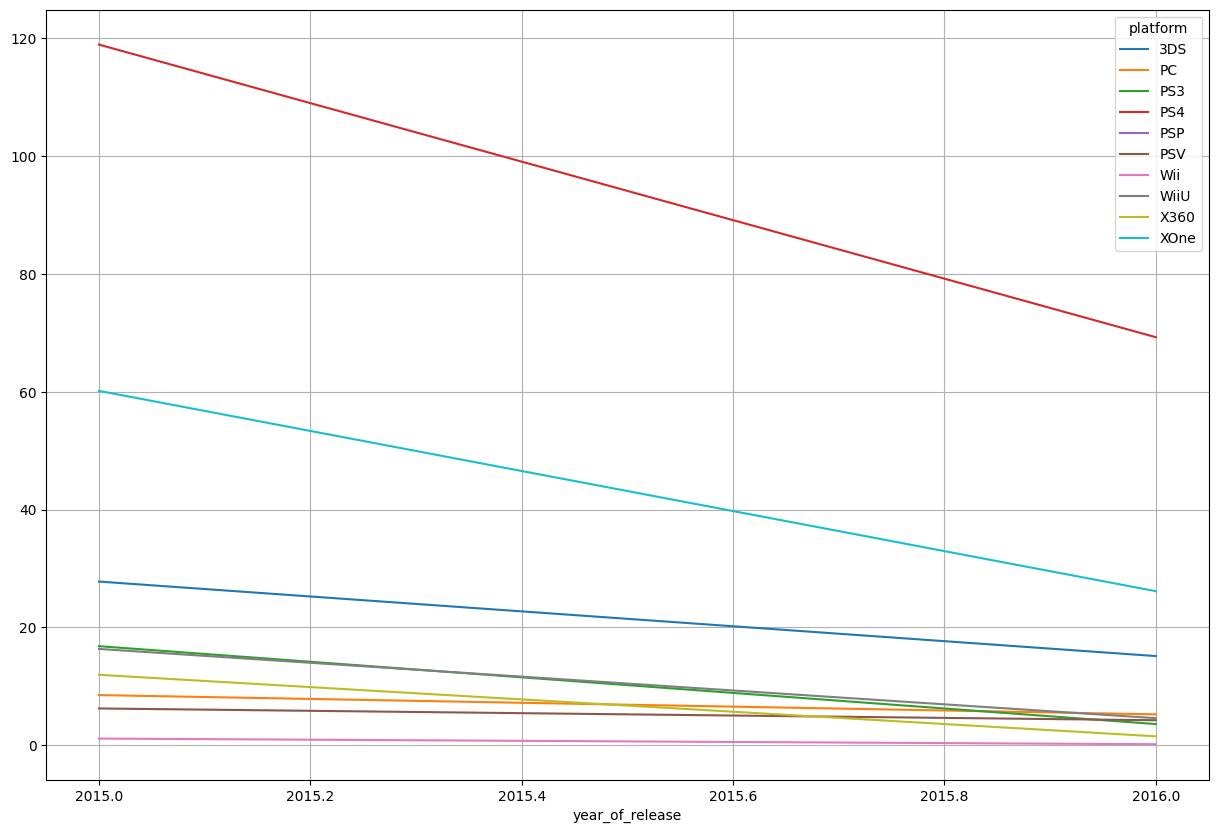

In [61]:
data1 = data.query("2015 <= year_of_release <= 2016") #сделаем срез по годам
data1.pivot_table(index = 'year_of_release', columns ='platform', values = 'sum_sales', aggfunc ='sum').plot(grid=True, figsize=(15,10));
#построим график

На графике видно, что продажи по каждой платформе от 2015 к 2016 году снижались. Из всех платформ в выборке остались только две которые имели положительные показатели относительно других. Это платформы XboxOne И PS4. По остальным платформам показатель продаж близится к 0.

In [62]:
#Просуммируем продажи по платформам и добавим результат в новый столбец
data.groupby(['platform'])[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sum_sales']].sum().reset_index()

,platform,na_sales,eu_sales,jp_sales,other_sales,sum_sales
0,2600,80.78,4.86,0.00,0.84,86.48
1,3DO,0.00,0.00,0.10,0.00,0.10
2,3DS,82.65,61.27,100.62,13.27,257.81
3,DC,5.43,1.69,8.56,0.27,15.95
4,DS,380.31,188.41,175.02,59.04,802.78
5,GB,113.64,47.51,85.12,8.16,254.43
6,GBA,184.12,74.59,46.56,7.61,312.88
7,GC,131.94,38.32,21.34,5.13,196.73
8,GEN,19.27,5.52,2.67,0.89,28.35
9,GG,0.00,0.00,0.04,0.00,0.04


Из таблицы и графика можно выделить две игровые платформы с наибольшими суммарными продажами. Это продажи от 40 млн - платформы XboxOne и PS4. Таким образом мы отсеиваем маленькие продажи или устарешвие игры.

#### Определение актуального периода и новая выборка

In [63]:
#далее обновим выборку и посмотрим статистику только по интересующим платформам
data1 = data1.query("platform==['XOne', 'PS4']")
data1.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,shooter,6.03,5.86,0.36,2.38,0.0,0.0,unknown,14.63
77,FIFA 16,PS4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,shooter,2.99,3.49,0.22,1.28,0.0,0.0,unknown,7.98
94,FIFA 17,PS4,2016,sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
99,Call of Duty: Black Ops 3,XOne,2015,shooter,4.59,2.11,0.01,0.68,0.0,0.0,unknown,7.39
105,Fallout 4,PS4,2015,role-playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
171,Uncharted 4: A Thief's End,PS4,2016,shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39
231,Uncharted: The Nathan Drake Collection,PS4,2015,action,2.07,1.71,0.08,0.76,86.0,8.1,T,4.62
242,Halo 5: Guardians,XOne,2015,shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
245,Call of Duty: Infinite Warfare,PS4,2016,shooter,1.61,2.00,0.15,0.71,77.0,3.4,M,4.47


Из графика выше видно самые продаваемые позиции за период 2015-2016 гг. За 1 год появляются новые и исчезают старые платформы.

#### Какие платформы лидируют по продажам, растут или падают

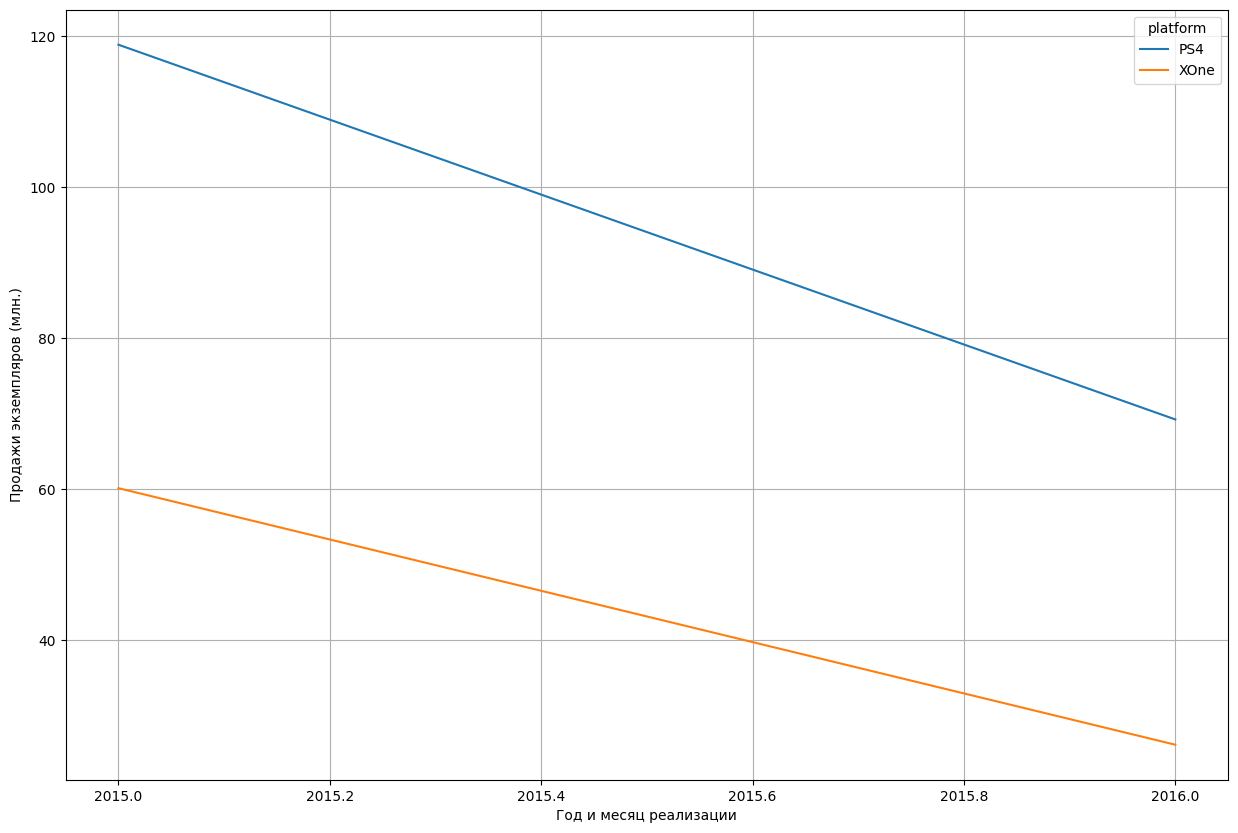

In [64]:
#Построим график распределения по годам с 2015 по 2016 (актуальный период)
data1.pivot_table(index = 'year_of_release', columns ='platform', values = 'sum_sales', aggfunc ='sum').plot(grid=True, figsize=(15, 10))
# меняем наименование горизонтальной линии ('X')
plt.xlabel('Год и месяц реализации')
# меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

На выбранном акутальном периоде 2015-2016гг можно сделать вывод: потенциально прибыльными платформами можно считать две платформы - PS4 и XOne.

#### Построение графика "ящик с усами" по глобальным продажам игр в разбивке по платформам

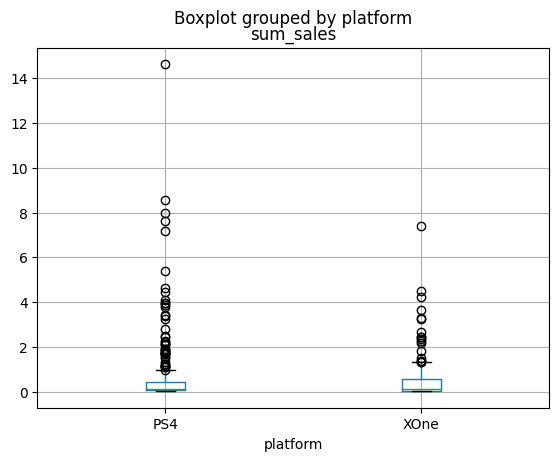

In [65]:
data1.groupby('platform')['sum_sales'].describe()
data1.boxplot(column='sum_sales', by='platform')
plt.show()

#### Просмотр влияния на продажи внутри одной популярной платформы отзывы пользователей и критиков

Для анализа возьмем платформу PS4, так как у этой платформы самые большие продажи в 2016 году

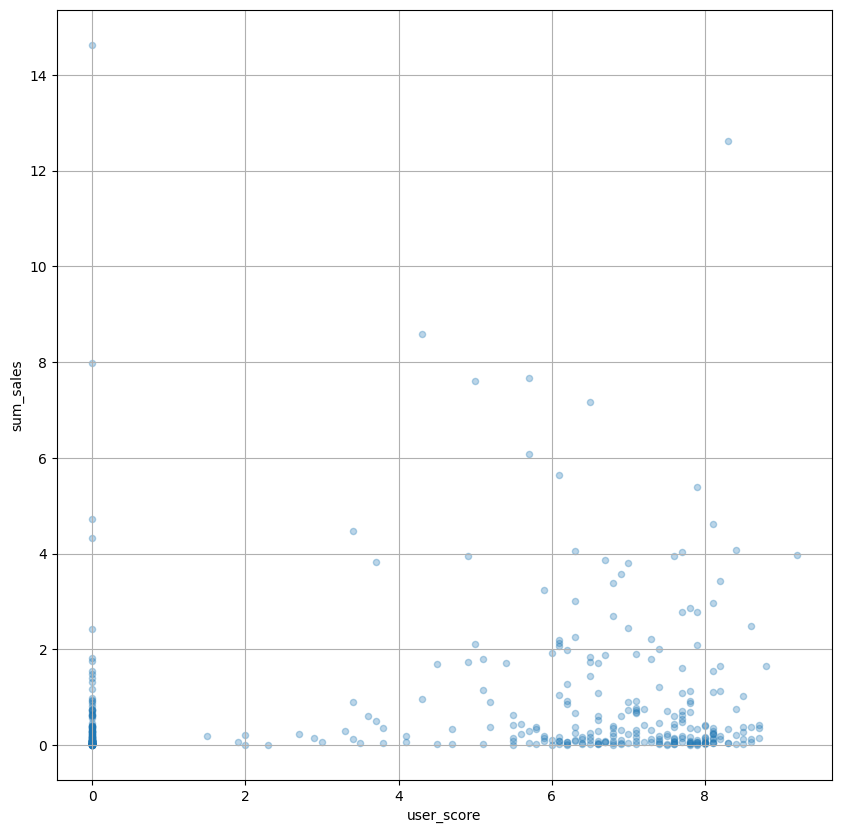

In [66]:
#ссоздадим талблицу рассеивания по платформе PS4, отобразив при этом отзывы пользователей
data[data['platform']=='PS4'].plot(x='user_score', y='sum_sales', kind='scatter', alpha=0.3, figsize=(10,10), grid=True)
plt.show()

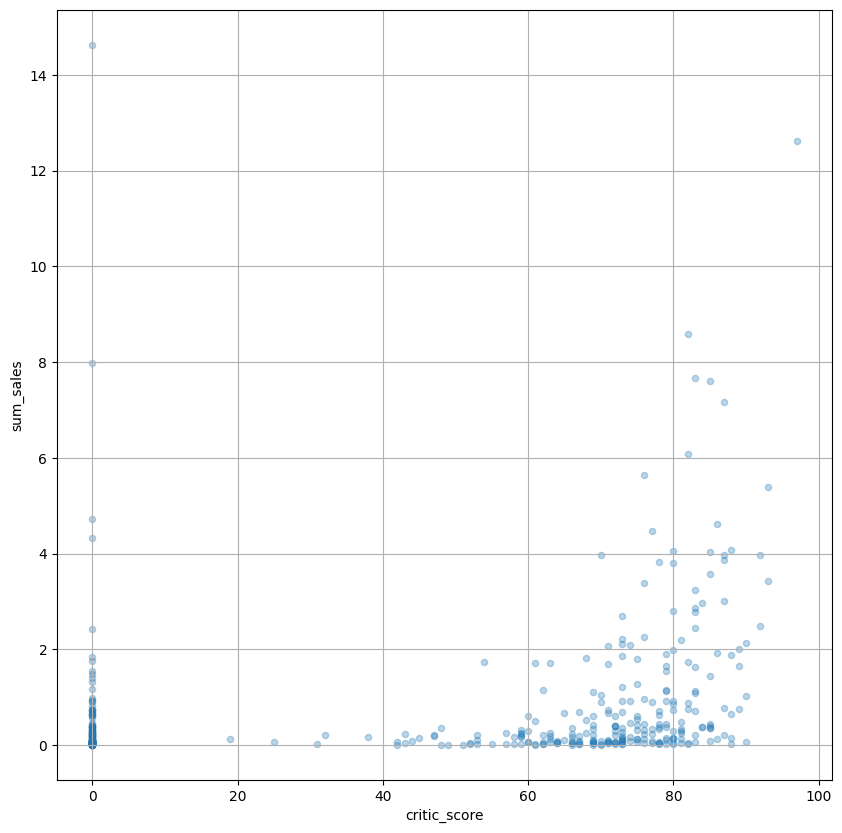

In [67]:
#создадим талблицу рассеивания по платформе PS4, отобразив при этом отзывы критиков
data[data['platform']=='PS4'].plot(x='critic_score', y='sum_sales', kind='scatter', alpha=0.3, figsize=(10,10), grid=True)
plt.show()

In [68]:
#посчитаем корреляцию между отзывами пользователей и суммарными продажами
data_ps4 = data[data['platform']=='PS4']
data_ps4_cor = data_ps4['user_score'].corr(data_ps4['sum_sales'])
print('Корреляция: {}'.format(data_ps4_cor))

Корреляция: 0.11311562450852883


In [69]:
#посчитаем корреляцию между отзывами критиков и суммарными продажами
data_ps4 = data[data['platform']=='PS4']
data_ps4_cor = data_ps4['critic_score'].corr(data_ps4['sum_sales'])
print('Корреляция: {}'.format(data_ps4_cor))

Корреляция: 0.22754960627752685


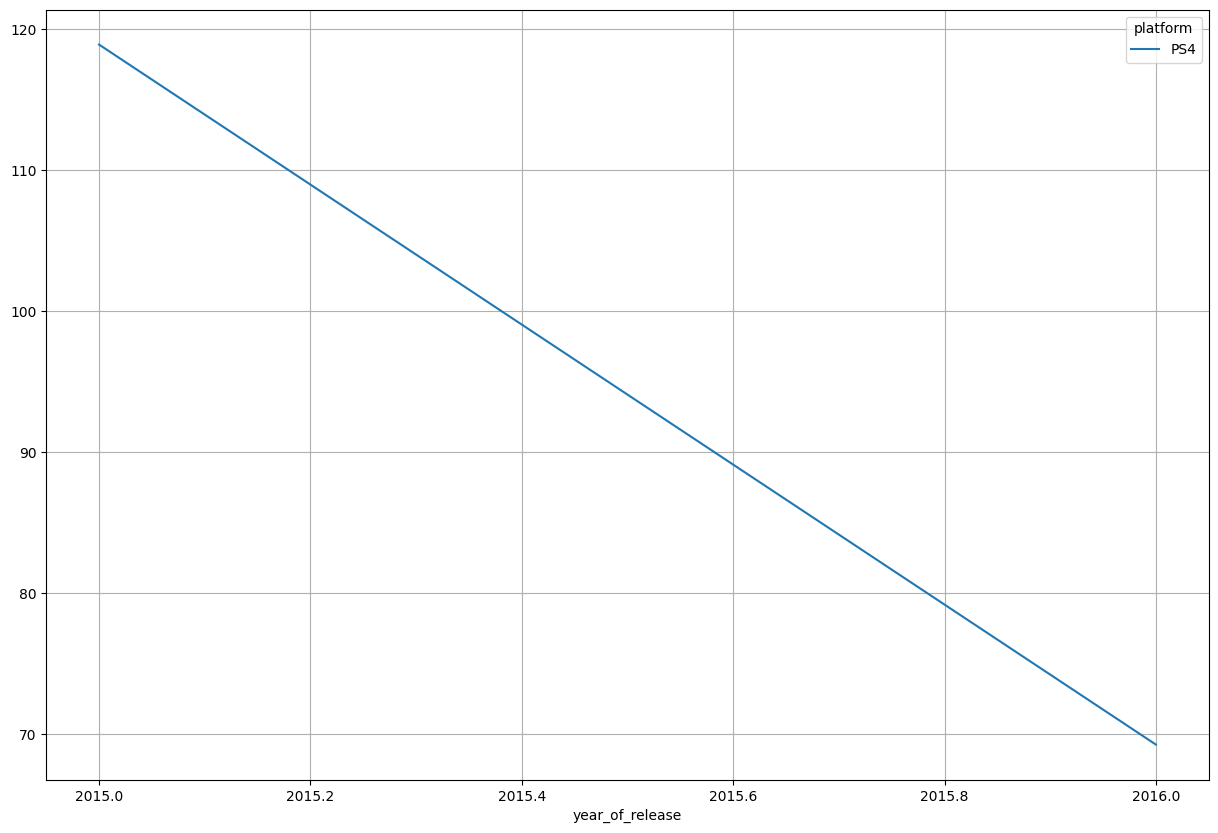

In [70]:
# Построим график распределения по платформе PS4
ps4 = data1.query("platform == ['PS4']")
ps4.pivot_table(index='year_of_release', columns = 'platform', values='sum_sales', aggfunc='sum').plot(grid=True, figsize=(15, 10))
plt.show()

**Вывод:** Вычислив корреляцию между суммой продаж и отзывами пользователей; суммой продаж и отзывами критиков можно сказать, что большую часть составлюят высокие оценки

#### Соответствие выводов с продажами игр на других платформах
Пердварительно, для работы построения новых диаграмм создадим новую таблицу

In [71]:
data_all_games = data
data_all_games.groupby('platform')['sum_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
2600,116.0,0.745517,0.956160,0.07,0.3075,0.480,0.7800,7.81
3DO,3.0,0.033333,0.023094,0.02,0.0200,0.020,0.0400,0.06
3DS,512.0,0.503535,1.441271,0.01,0.0500,0.120,0.3325,14.60
DC,52.0,0.306731,0.468660,0.02,0.0775,0.135,0.2975,2.41
DS,2121.0,0.378491,1.436042,0.01,0.0500,0.110,0.2700,29.80
GB,97.0,2.622990,5.390925,0.06,0.3000,1.180,2.1800,31.38
GBA,811.0,0.385795,0.899654,0.01,0.0550,0.160,0.3900,15.84
GC,542.0,0.362970,0.693974,0.01,0.0600,0.150,0.3675,7.06
GEN,27.0,1.050000,1.490041,0.03,0.0700,0.150,1.7050,6.02


Посмтроим диаграмму размаха по всем платформам. 

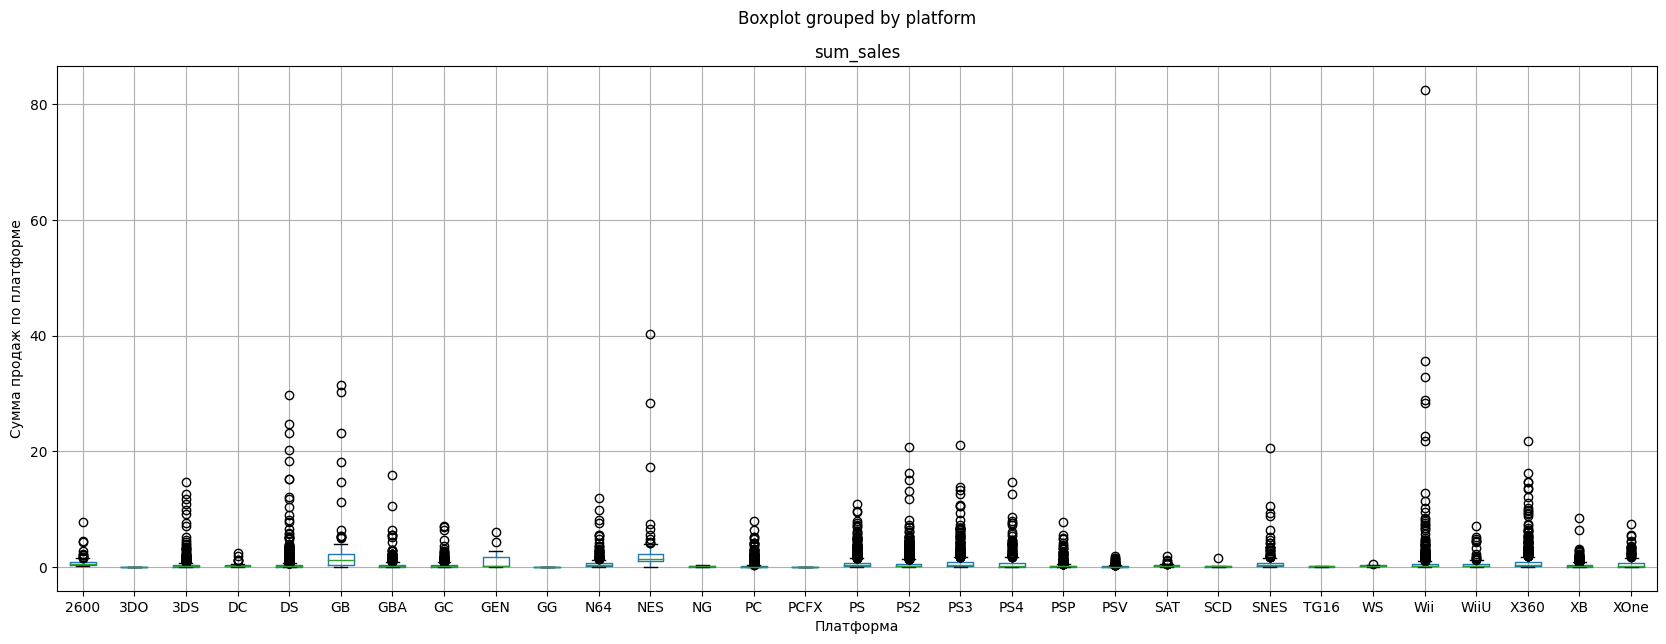

In [72]:
# построим диаграмму размаха общего плана
data_all_games.boxplot(column='sum_sales', by='platform', figsize=(20,7))
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж по платформе')
plt.show()

В полученной диаграмме видно, что есть редкие выбросы с продажами 40 и 80 млн(по всей видимости было две очень популярных игры). Чтобы посмотреть выбросы до 40 млн увеличим масштаб диаграммы, тем самым уберем лишнее.

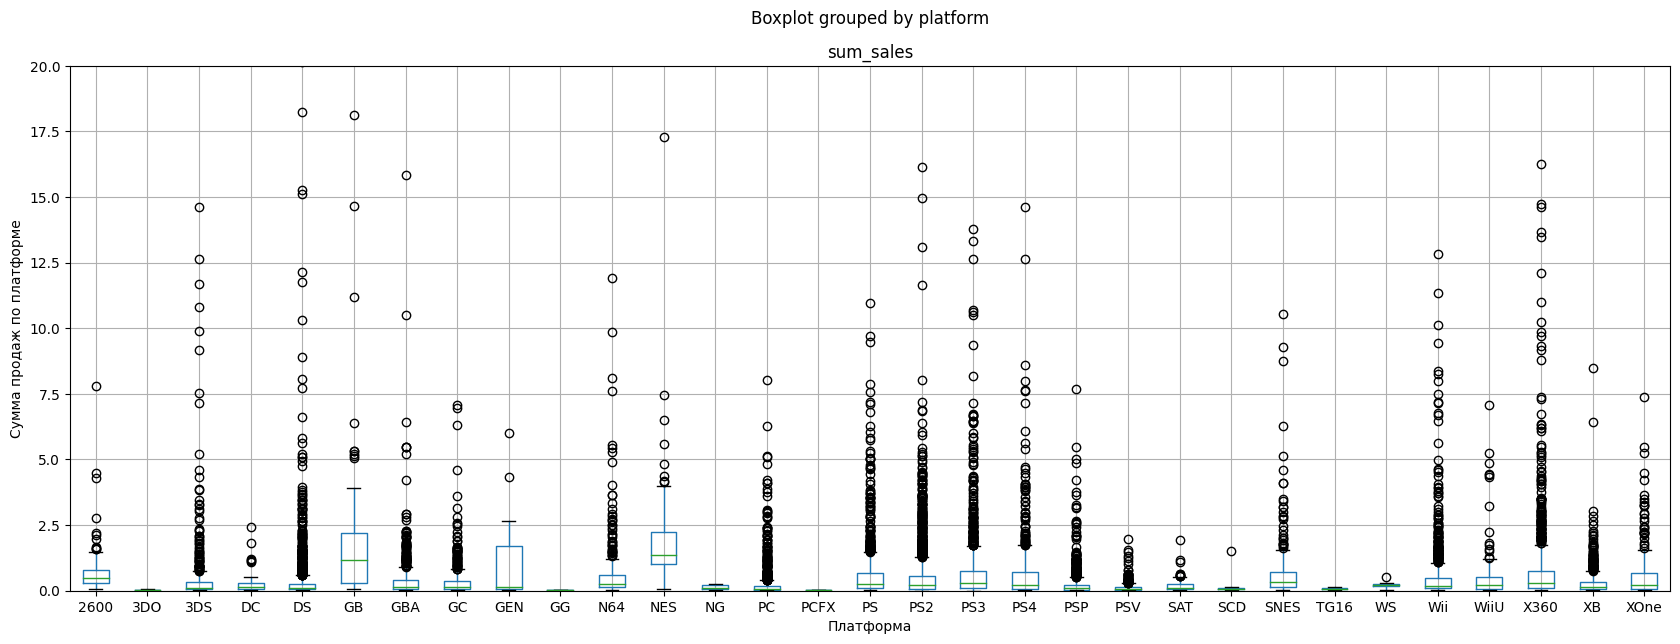

In [73]:
#уменьшаем объем просматриваемых данных
data_all_games.boxplot(column='sum_sales', by='platform', figsize=(20,7))
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж по платформе')
plt.ylim(0, 20)
plt.show()

В новой диаграмме также есть редкие выбросы у всех позиций, что нас не интересует. Необходимо оставлять выбросы которые будут полезны статистке. Умеьшим еще диапозон отсматривымых данных

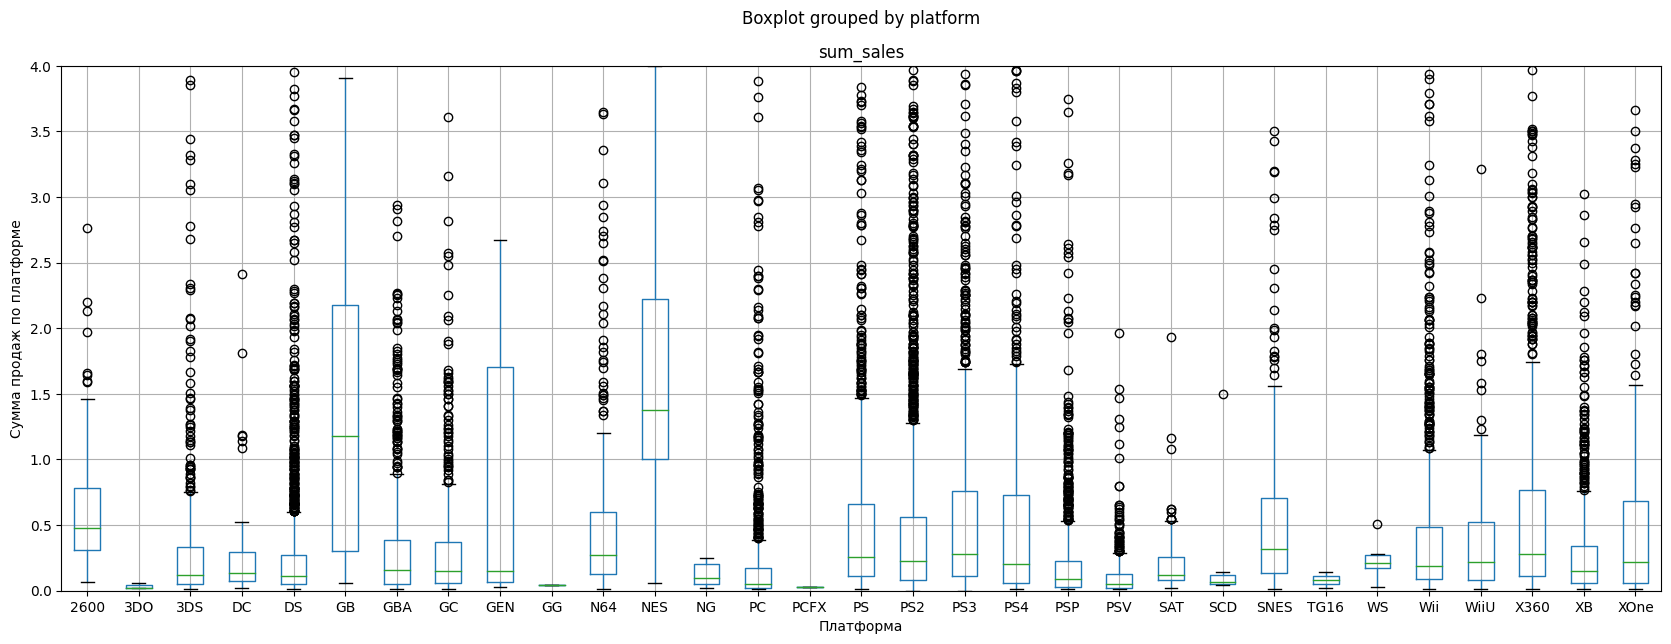

In [74]:
data_all_games.boxplot(column='sum_sales', by='platform', figsize=(20,7))
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж по платформе')
plt.ylim(0, 4)
plt.show()

Окончательная диграмма будет выглядеть так. После просмотра диаграмм размаха с разными диапазонами можем подвести итог(также учтем, что мы будет сравнивать продажи платформ из нашей выборки с теми, которые не попали в нее). Можем взять несколько платформ которые выделяются на фоне других: PC, PS, PS4, XOne. Границы у всех выбранных платформ высокие, но при всем этом медиана кроме PS и PS4, не выходит за рамки 0.5 млн продаж, т.к. медиана и размах примерно на одном уровне, можно сказать, что у наших платформ, в отличии от тех, которые не попали в выборку есть намного больше игр, которые покупались намного чаще.

#### Проверка общего распределения игр по жанрам

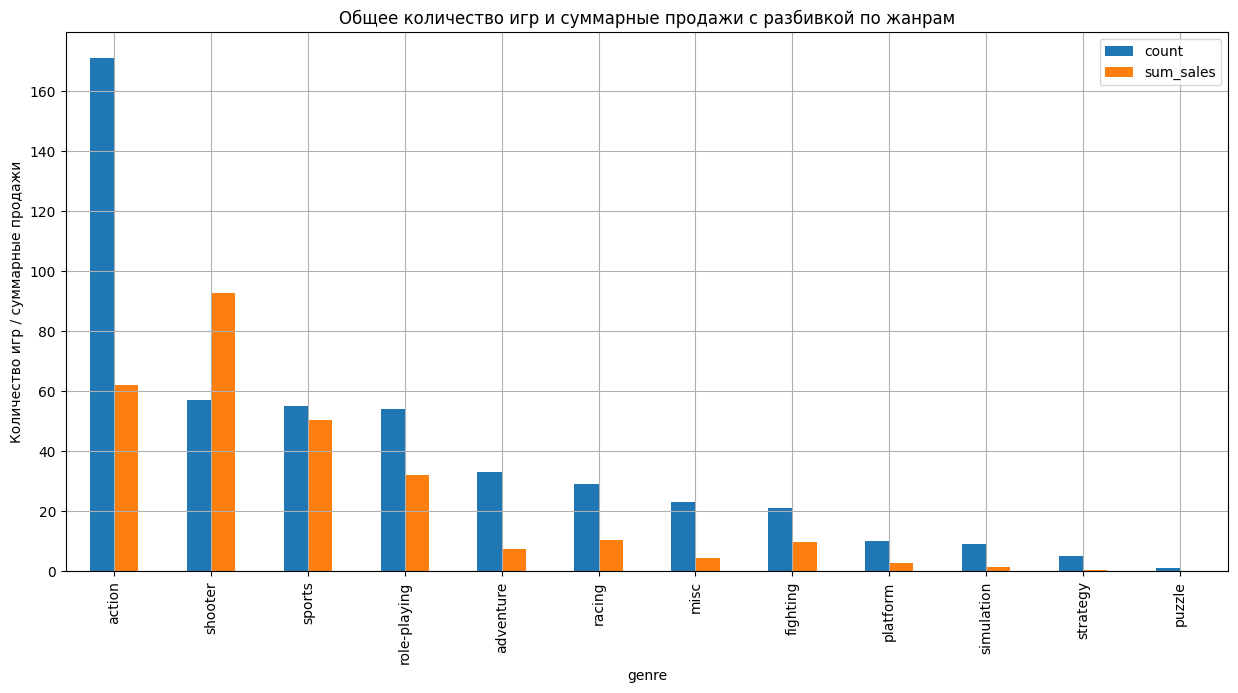

In [77]:
#сделаем группировку по жанрам в выбранной выборке по 'data1'
data_genre = data1.groupby('genre').agg({'name':'count', 'sum_sales':'sum'}).sort_values(by = 'name', ascending = False)
data_genre.columns = ['count', 'sum_sales']
 
#Построим график, который покажет общее количество игр и суммарные продажи по ним
data_genre.plot(kind = 'bar', grid=True, figsize = (15, 7), title='Общее количество игр и суммарные продажи с разбивкой по жанрам')
plt.ylabel("Количество игр / суммарные продажи");

Стабильно приносят доход два жанра: action и shooter. Посмотрим по ним средние и медианные продажи по актуальной выборке(2015 и 2016 года)

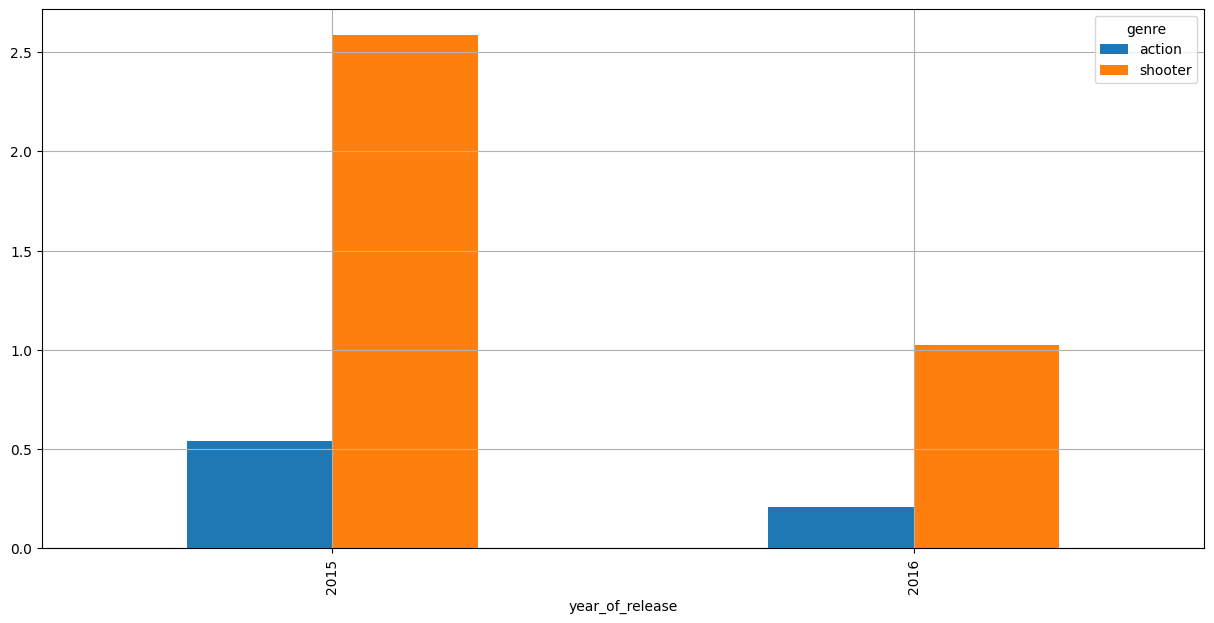

In [78]:
data2 = data1.query("genre==['action', 'shooter']")
data2.pivot_table(index = 'year_of_release', columns ='genre', values = 'sum_sales', aggfunc ='mean').plot(kind='bar', grid=True, figsize=(15, 7));

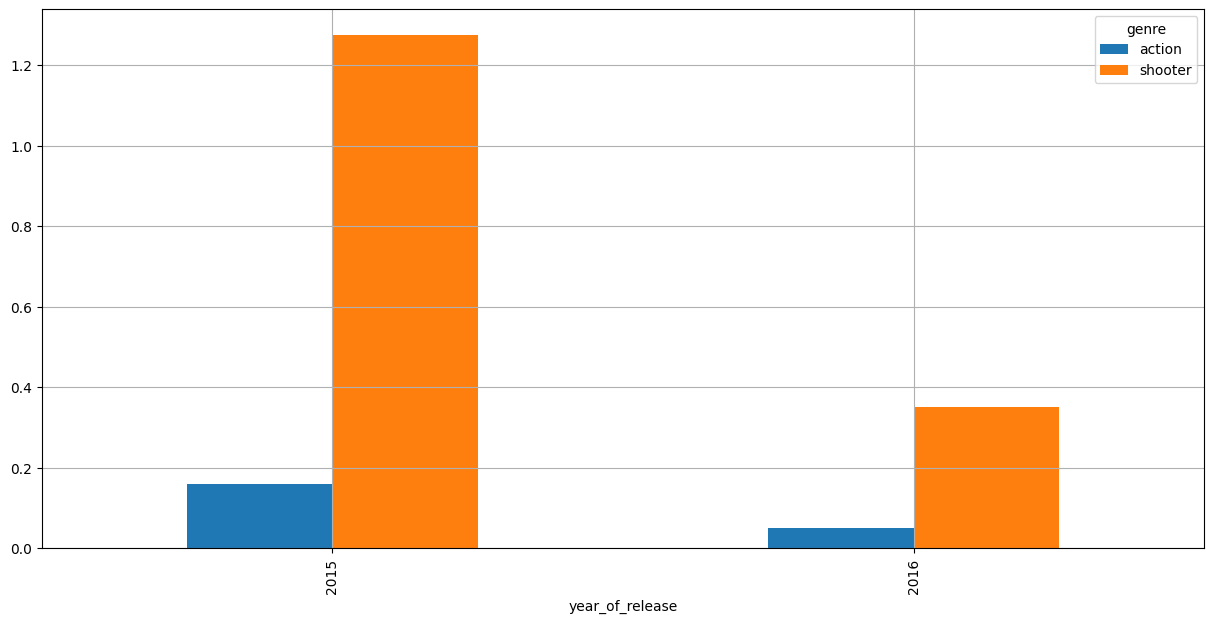

In [79]:
data2 = data1.query("genre==['action', 'shooter']")
data2.pivot_table(index = 'year_of_release', columns ='genre', values = 'sum_sales', aggfunc ='median').plot(kind='bar', grid=True, figsize=(15, 7));

In [80]:
data2.sort_values(by='name', ascending=True).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
9197,7 Days to Die,PS4,2016,action,0.04,0.08,0.0,0.02,45.0,5.9,M,0.14
12863,7 Days to Die,XOne,2016,action,0.03,0.02,0.0,0.00,35.0,5.2,M,0.05
10893,Adventure Time: Finn & Jake Investigations,PS4,2015,action,0.03,0.05,0.0,0.02,0.0,0.0,unknown,0.10
12920,Adventure Time: Finn & Jake Investigations,XOne,2015,action,0.03,0.02,0.0,0.00,0.0,0.0,unknown,0.05
14902,Aegis of Earth: Protonovus Assault,PS4,2016,action,0.02,0.00,0.0,0.00,57.0,7.8,T,0.02


### Составление портрета пользователя каждого региона

#### Самые популярные платформы по регионам NA, EU, JP

In [81]:
def region_graph (region, ax):
    title_dict = {'na_sales' : 'North America Sales', 'eu_sales' : 'Europe Sales', 'jp_sales' : 'Japan Sales'}
    color_dict = {'na_sales' : 'yellow', 'eu_sales' : 'blue', 'jp_sales' : 'green'}
    result_one = data.groupby('platform')[region].sum().sort_values(ascending=False).head()\
    .plot(kind='bar', ax=axes[ax], title=title_dict[region], color=color_dict[region])
    return(result_one)

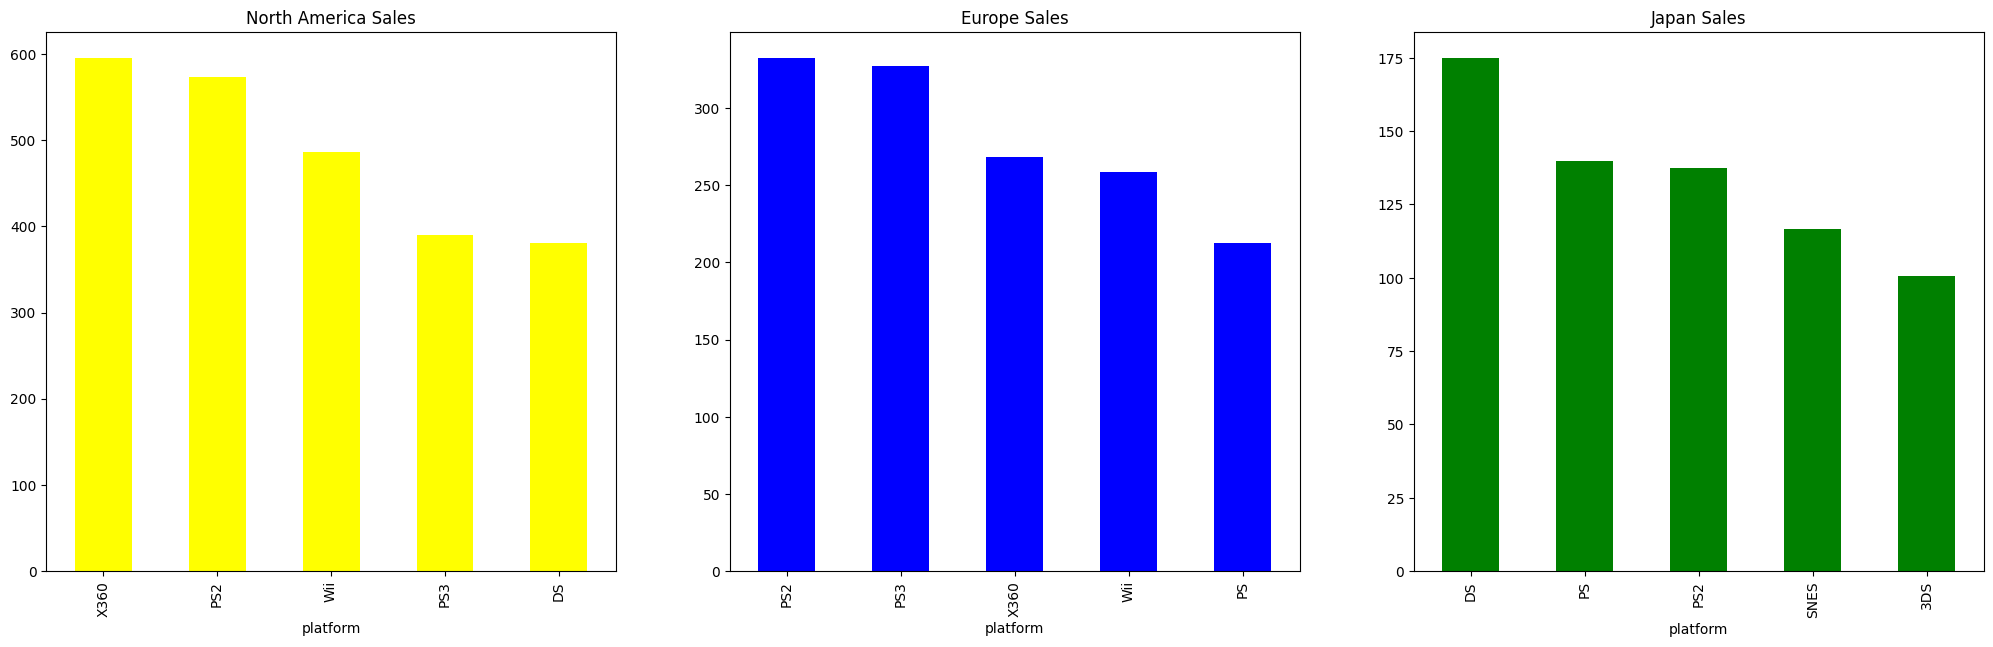

In [82]:
fig, axes = plt.subplots(1,3, figsize=(25,7))
region_graph('na_sales', 0)
region_graph('eu_sales', 1)
region_graph('jp_sales', 2);

In [83]:
print('Топ 5 жанров по регионам:')
print('Америка', data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head())
print('Европа', data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head())
print('Япония', data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head())

Топ 5 жанров по регионам:
Америка platform
X360    595.74
PS2     572.92
Wii     486.87
PS3     390.13
DS      380.31
Name: na_sales, dtype: float64
Европа platform
PS2     332.63
PS3     327.21
X360    268.32
Wii     258.32
PS      212.39
Name: eu_sales, dtype: float64
Япония platform
DS      175.02
PS      139.78
PS2     137.54
SNES    116.55
3DS     100.62
Name: jp_sales, dtype: float64


#### Самые популярные жанры

In [84]:
def genre_graph (region, ax):
    title_dict = {'na_sales' : 'North America Sales', 'eu_sales' : 'Europe Sales', 'jp_sales' : 'Japan Sales'}
    color_dict = {'na_sales' : 'yellow', 'eu_sales' : 'blue', 'jp_sales' : 'green'}
    result_one = data.groupby('genre')[region].sum().sort_values(ascending=False).head()\
    .plot(kind='bar', ax=axes[ax], title=title_dict[region], color=color_dict[region])
    return(result_one)

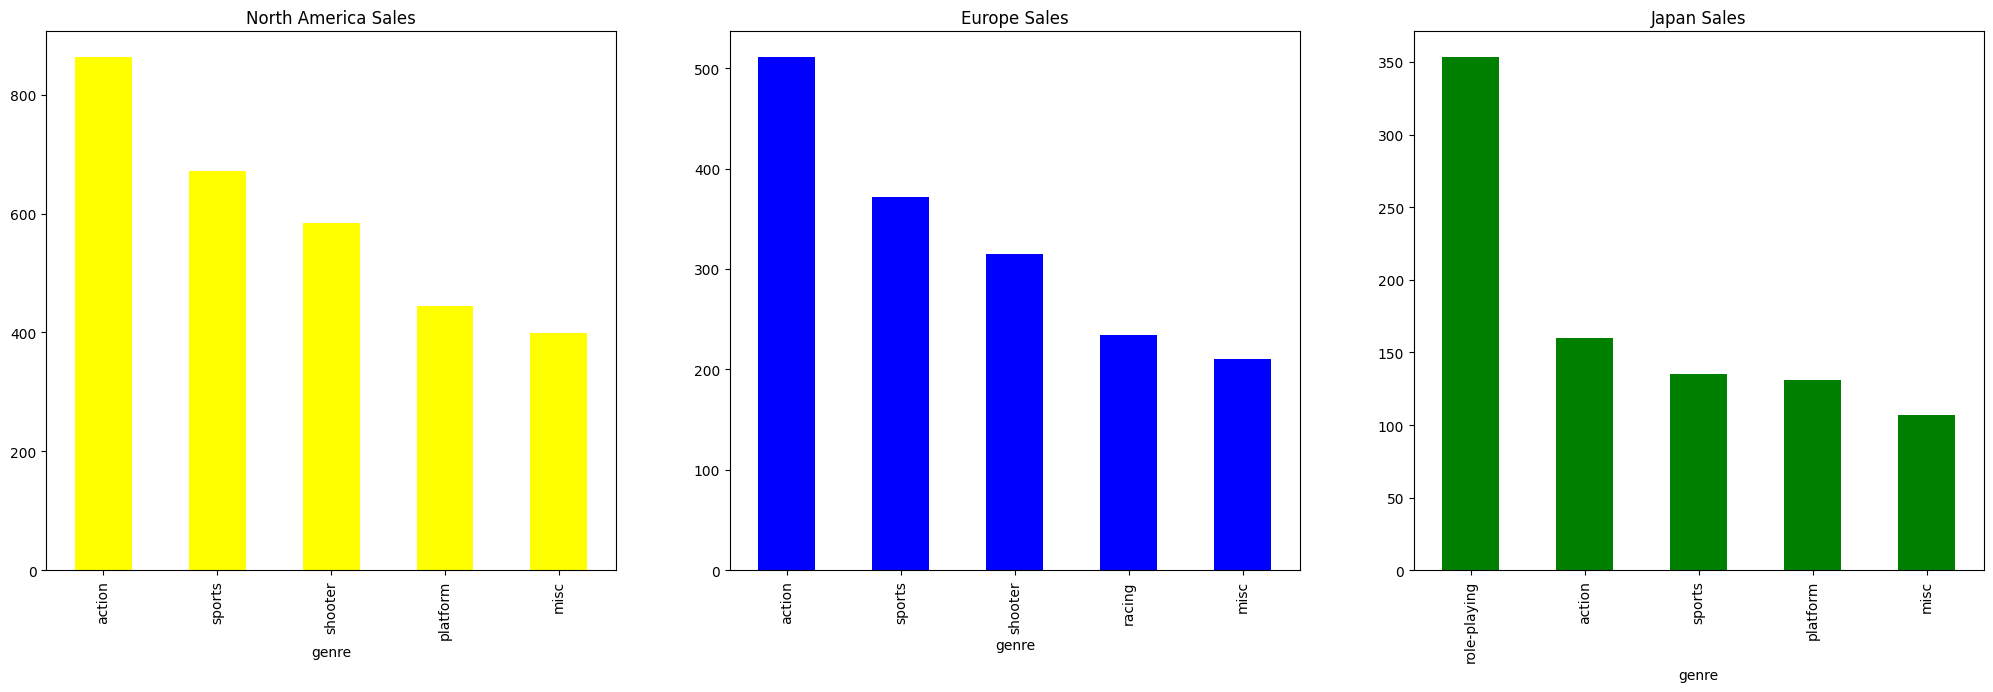

In [85]:
fig, axes = plt.subplots(1,3, figsize=(25,7))
genre_graph('na_sales', 0)
genre_graph('eu_sales', 1)
genre_graph('jp_sales', 2);

In [86]:
print('Топ 5 жанров по регионам:')
print('Америка', data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head())
print('Европа', data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head())
print('Япония', data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head())

Топ 5 жанров по регионам:
Америка genre
action      863.17
sports      671.20
shooter     584.83
platform    444.44
misc        399.57
Name: na_sales, dtype: float64
Европа genre
action     510.99
sports     371.33
shooter    314.52
racing     234.49
misc       210.60
Name: eu_sales, dtype: float64
Япония genre
role-playing    353.39
action          160.14
sports          134.93
platform        130.71
misc            107.02
Name: jp_sales, dtype: float64


#### Влияние рейтинга ESRB на продажи в отдельных регионах

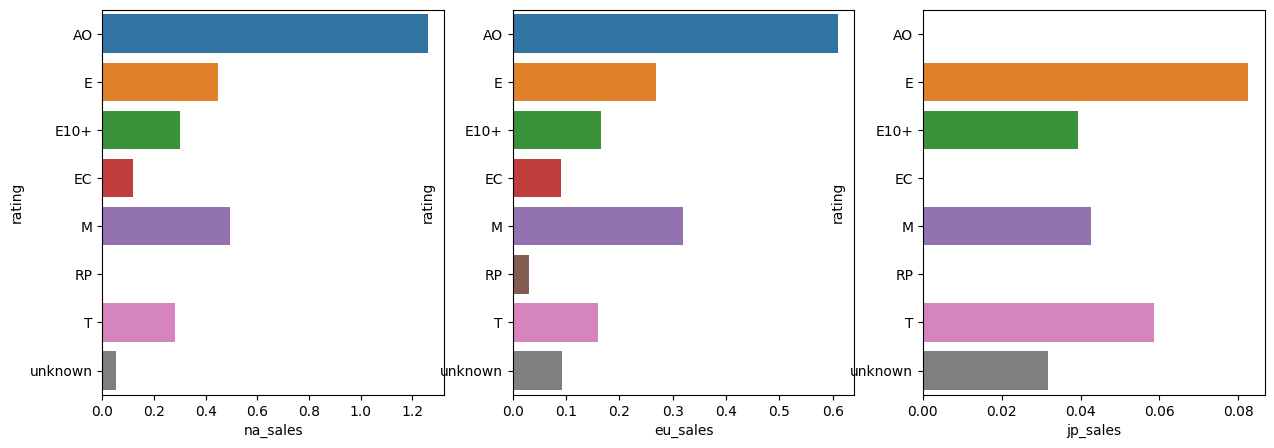

In [90]:
data_ESRB = data.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='mean')
fig, axes = plt.subplots(1,3, figsize=(15,5))
sns.barplot(x=data_ESRB['na_sales'], y=data_ESRB.index, ax=axes[0])
sns.barplot(x=data_ESRB['eu_sales'], y=data_ESRB.index, ax=axes[1])
sns.barplot(x=data_ESRB['jp_sales'], y=data_ESRB.index, ax=axes[2])
plt.show()

Рейтинг влияет на продажи только в Европе и Америке. В Японии игры не делятся по рейтингу ESRB. Система рейтинга родом из США, работает там и косвенно касается Европы, но не Японии.Для удобства мы в самом начале пропущенные значения в столбце рейтинг заменили на unknown и на графике продаж Японии видим, что у большинства игр не определен рейтинг ESRB.
Рейтинг в регионах Америки и Европы влияет на показатели продаж: самые продаваемвые игры - игры с рейтингом M(игры 18+). Игры в целом заточены под более взрослых людей, чем детей и подростков.

### Проверка гипотез

#### Средние пользовательские рейтинги платформ Xbox One и PC

Сформулируем гипотезы:
 * H0 - средние рейтинги по платформам одинаковые
 * H1 - средние рейтинги по платформам разные

In [88]:
# убираем значения, которые были пропусками
data = data[data['user_score'] != 0]
#вывел две выборки по необходимым платформам
data_xbox = data[data['platform'] == 'XOne']
data_pc = data[data['platform'] == 'PC']
#обозначили две выборки конкретных столбцов с пользовательскими рейтингами.
xbox_1 = data_xbox['user_score']
pc_1 = data_pc['user_score']
alpha = .05 # критический уровень статистической значимости
#если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(xbox_1,pc_1)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3037979620149106e-05
Отвергаем нулевую гипотезу


Вывод: из проведенного исследования следует, что средние рейтинги по платформам разные

#### Средние пользовательские рейтинги жанров Action и Sports
Сформулируем гипотезы:
 * H0 - средние рейтинги по жанрам одинаковые
 * H1 - средние рейтинги по жанрам разные

In [89]:
# убираем значения, котрые были пропусками
data = data[data['user_score'] != 0]
data_action = data[data['genre'] == 'action']
data_sports = data[data['genre'] == 'sports']
action_1 = data_action['user_score']
sports_1 = data_sports['user_score']
alpha = .05 # критический уровень статистической значимости
#если p-value окажется меньше него - отвегнем гипотезу
results = st.ttest_ind(action_1,sports_1)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.06480928064420527
Не получилось отвергнуть нулевую гипотезу


Вывод: из проведенного исследования следует, что средние рейтинги по жанрам одинаковые

Общий вывод: Была выбрана двухсторонняя гипотеза потому что среднее значение генеральной совокупности равно определенному числу. Следовательно воспользовался t-тестом. Критерием для проверки будет отношение p-value и alpha. Alpha выбрали 5% так как нам достаточно выбраного критического уровня статистический значимости(меньше 5% требуется только при исследовании в медицине).

### Общий вывод

После небольшой подготовки входных данных мною были проведены исследовательский, а также статистический анализы данных. Опираясь на небольшие выводы по каждому пункту выделю основные итоги проделанной работы:
 * для составления прогноза продаж на 2017 год был выбран актуальный период 2015 и 2016 года по которому видно, что одними из популярных платформ были PS4 и XboxOne(лидирующая из них PS4). Остальные платформы не рассматривал, так как они имели спад продаж в 2016 году
 * Вычислив корреляцию между суммой продаж и отзывами пользователей; суммой продаж и отзывами критиков можно сказать, что большую часть составлюят высокие оценки
 * после построения диаграмм размаха для определения соответствия выводов с продажами игр на других платформах было выявлено следующее: Можем взять несколько платформ которые выделяются на фоне других: PC, PS, PS4, XOne. Границы у всех выбранных платформ высокие, но при всем этом медиана кроме PS и PS4, не выходит за рамки 0.5 млн продаж, т.к. медиана и размах примерно на одном уровне, можно сказать, что у наших платформ, в отличии от тех, которые не попали в выборку есть намного больше игр, которые покупались намного чаще.
 * стабильно приносят доход два жанра игр: action и shooter
 * Топ рейтинг от организации ESRB можно считать категорию M (игры 18+)

На следующий год предлагаю сделать выбор в пользу платформы PS4, так как она популярна в большинстве стран мира. В жанрах лидируют экшены.
Статистический анализ данных показал следующее: при проверке средних пользовательских рейтингах платформ XboxOne и PC была выдвинута нулевая гепотеза, что средние рейтингы по платформам одинаковые, а альтернативная гепотеза имела обратное увтерждение. В результате рассчетов было установлено, что нулевая гепотеза отвергается, а это значит что средние рейтинги по платформам разные
При проверке средних пользовательских рейтингов жанров Action и Sports были выдвинуты аналогичные гипотезы. В результате расчетов было установлено, что средние рейтинги по жанрам одинаковые. Для проверки гипотез был выбран критический уровень статистической значимости 5%